In [1]:
import random
import matplotlib

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from copy import deepcopy
from tqdm import tqdm
from collections import Counter
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from IPython.display import clear_output

In [2]:
def print_stats(day):
    return "Day:" + str(day) + "\tP:" + str(len(population)) + "\tS:" + str(get_status("free", True)) + "\tI:" + str(get_status('infected', True)) + "\tH:" + str(len(hospitalised)) + "\tC:" + str(len(cured)) + "\tD:" + str(len(dead)) + "\tP+H+D:" + str(len(population) + len(hospitalised) + len(dead)) + "\tprobability:" + str(round(get_status('infected', True)/len(population), 1))


In [3]:
def gen_rand_coordinates(n):
    x = np.random.randint(low=0, high=2*n, size=n)
    y = np.random.randint(low=0, high=2*n, size=n)
    
    coordinates = [(i, j) for i, j in zip(x, y)]
    
    return list(set(coordinates)), list(range(len(set(coordinates))))

In [4]:
def random_walk(current_position, person, day):
    path = []
    edges = []
    path.append(deepcopy(current_position))
    
    percentage = 0 #int(len(hospitalised)/2000)
    
    if day > 15:
        percentage = 3
    if day > 30:
        percentage = 6
    
    if person['age']>15 and person['age']<60:
        m = 40
        m_ = int(m/10)
        m = m - (m_*percentage)
        n = np.random.randint(0, m)
        
    else:        
        m = 30
        m_ = int(m/10)
        m = m - (m_*percentage)
        n = np.random.randint(0, m)
        
    for i in range(n):
        person_neighbours = neighbours[current_position]
        if len(person_neighbours) > 0:
            next_position = np.random.choice(person_neighbours)
            path.append(next_position)
            edges.append((current_position, next_position))
            current_position = deepcopy(next_position)
    return path, edges

In [5]:
def random_sample(data, n):
    idx = np.random.randint(low=0, high=len(data), size=n)
    return [data[i] for i in idx], idx

In [6]:
def get_status(state, value):
    return Counter([p['state']==state for p in population.values()])[value]

In [7]:
def get_p_at(effected=True):
    return [p['at'] for p in population.values() if p['state']=='infected']

In [8]:
def effect_person(person):
    person['state'] = 'infected'
    person['incubation_period'] = np.random.randint(low=2, high=12)

In [9]:
def plot_plot(rw_normal_edges=None, rw_effected_edges=None, clear=False, iter_=0):
    clear_output(wait=clear)
    
    pop = [p['at'] for i, p in population.items()]
    eff = get_p_at()

    plt.figure(0, figsize=(25, 25))
    
    nx.draw_networkx_nodes(G, pos,
                           nodelist=pop,
                           node_color='blue', node_size=5)

    nx.draw_networkx_nodes(G, pos,
                           nodelist=eff,
                           node_color='r', node_size=50)

    nx.draw_networkx_edges(G, pos,
                           edgelist=edges,
                           width=0.3,alpha=0.3,edge_color='b')

    if rw_normal_edges is not None:
        nx.draw_networkx_edges(G,pos,
                               edgelist=rw_normal_edges,
                               width=0.5,alpha=0.3,edge_color='y')

        nx.draw_networkx_edges(G,pos,
                               edgelist=rw_effected_edges,
                               width=2,alpha=0.3,edge_color='red')

    nx.draw_networkx(G, pos, node_size=1, with_labels=False)
    s = "Day: "+str(iter_)+" | Population: " + str(len(population)) + " | Infected: " + str(get_status('infected', True)) + " | Hospitalised: " + str(len(hospitalised)) + " | Infection Probability: " + str(round(get_status('infected', True)/len(population), 2)) + " | Cured: " + str(len(cured)) + " | Dead: " + str(len(dead))
    plt.title(s, fontsize=20)
    plt.savefig("image"+str(iter_)+".png", format="PNG")
    plt.show()

In [10]:
def is_dead(p):
    
    all_probs = []
    
    for i in p['comorbidities']:
        if i in comorbidities_deceased:
            k = comorbidities_deceased[i]
            ps = np.array([100-k, k])/100
            all_probs.append(ps)

#     if len(prob_comorbidities) > 1:
#         print(prob_comorbidities)
#         prob_comorbidities = np.array(prob_comorbidities).sum(1)
#         print(prob_comorbidities)

#             if np.random.choice([False, True], p=ps):
#                 return True

    age = p['age']
    if age <= 40: #age >= 10 and age 
        prob = 0.2
    elif age >= 40 and age <= 49:
        prob = 0.4
    elif age >= 50 and age <= 59:
        prob = 1.3
    elif age >= 60 and age <= 69:
        prob = 3.6
    elif age >= 70 and age <= 79:
        prob = 8.0
    elif age >= 80:
        prob = 14.8

    all_probs.append(np.array([100-prob, prob])/100)
    
    prob_n_comorbidities = n_comorbidities_deceased[p['n_comorbidities']]
    all_probs.append(np.array([1-prob_n_comorbidities, prob_n_comorbidities]))
    
    master_prob = np.array(all_probs).mean(0)

#     prob_age = np.random.choice([False, True], p=prob_/100)
#     prob_comorbidities = np.random.choice([False, True], p=[1-n, n])

#     print(prob_age, prob_comorbidities, master_prob)

    master_prob_decision = np.random.choice([False, True], p=master_prob)
    
    if master_prob_decision:
        return True
    return False

In [11]:
n_days = 100

In [12]:
n_nodes = 1000
connectivity = 5
n_population = n_nodes * 2
n_effected_people = 2 #int(n_population/100)

contamination_confidence = 100

In [13]:
coordinates, coordinates_idx = gen_rand_coordinates(n_nodes)

In [14]:
_, p_coord = random_sample(coordinates, n_population)

In [15]:
# p_ages = np.random.randint(low=2, high=80, size=n_population)

In [16]:
### Germany

# 0-14 years: 12.83% (male 5,299,798 /female 5,024,184)
# 15-24 years: 9.98% (male 4,092,901 /female 3,933,997)
# 25-54 years: 39.87% (male 16,181,931 /female 15,896,528)
# 55-64 years: 14.96% (male 5,989,111 /female 6,047,449)
# 65 years and over: 22.36% (male 7,930,590 /female 10,061,248) (2018 est.)

In [17]:
# Diseases N %
# schemic heart disease 145 30.1
# Atrial Fibrillation 106 22.0
# Stroke 54 11.2
# Hypertension 355 73.8
# Diabetes 163 33.9
# Dementia 57 11.9
# COPD 66 13.7
# Active cancer in the past 5 years 94 19.5
# Chronic liver disease 18 3.7
# Chronic renal failure 97 20.2

In [18]:
comorbidities_deceased = {'Congestive Heart Failure': 30.1, 'Stroke': 11.2, 'Hypertension': 73.8,
                         'Diabetes Mellitus': 33.9, 'Dementia': 11.9, 'Respiratory Disease': 13.7}

In [19]:
#  0 comorbidities 6 1.2
#  1 comorbidity 113 23.5
#  2 comorbidities 128 26.6
#  3 comorbidities and over 234 48.6

In [20]:
n_comorbidities_deceased = np.array([1.3, 23.5, 26.6, 48.6])

In [21]:
n_comorbidities_deceased = n_comorbidities_deceased/n_comorbidities_deceased.sum()

In [22]:
age_dist = np.array([12.83, 9.98, 39.87, 14.96, 22.36])

In [23]:
p_ages = []
p_n_comorbidities = []

for i in range(n_population):
    age_dist_sampled = np.random.choice([0, 1, 2, 3, 4], p=age_dist/100)
    
    if age_dist_sampled == 0:
        age_sampled = np.random.randint(low=0, high=14)
        comorbiditiy_sampled = 0 #np.random.choice([0, 1, 2, 3], p=[0.90, 0.05, 0.03, 0.02])
        
    elif age_dist_sampled == 1:
        age_sampled = np.random.randint(low=15, high=24)
        comorbiditiy_sampled = np.random.choice([0, 1, 2, 3], p=[0.80, 0.10, 0.06, 0.04])
        
    elif age_dist_sampled == 2:
        age_sampled = np.random.randint(low=25, high=54)
        comorbiditiy_sampled = np.random.choice([0, 1, 2, 3], p=[0.60, 0.20, 0.10, 0.10])
        
    elif age_dist_sampled == 3:
        age_sampled = np.random.randint(low=55, high=64)
        comorbiditiy_sampled = np.random.choice([0, 1, 2, 3], p=[0.40, 0.30, 0.15, 0.15])
        
    elif age_dist_sampled == 4:
        age_sampled = np.random.randint(low=65, high=100)
        comorbiditiy_sampled = np.random.choice([0, 1, 2, 3], p=[0.30, 0.30, 0.20, 0.20])
        
    p_ages.append(age_sampled)
    p_n_comorbidities.append(comorbiditiy_sampled)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17c92190>]],
      dtype=object)

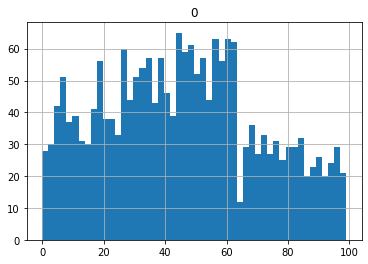

In [24]:
pd.DataFrame(p_ages).hist(bins=50)

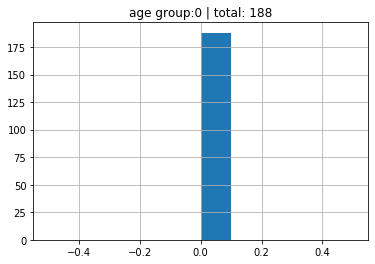

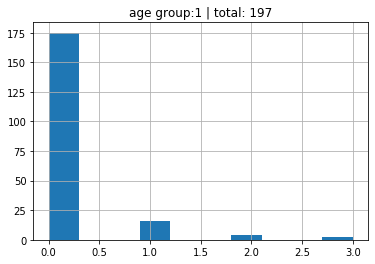

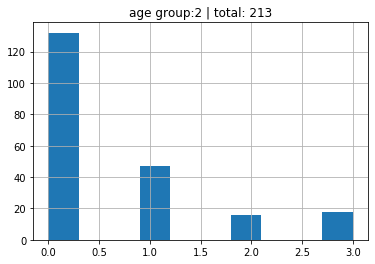

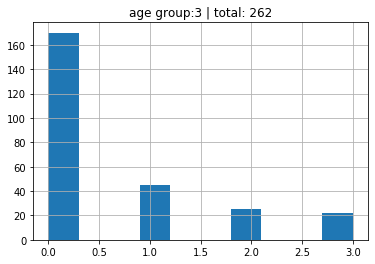

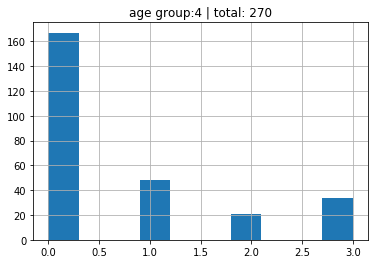

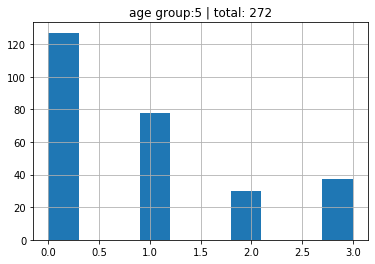

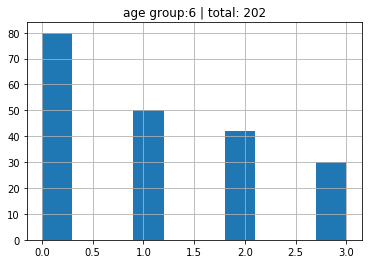

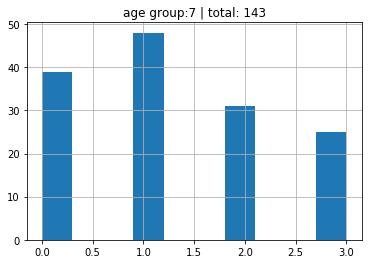

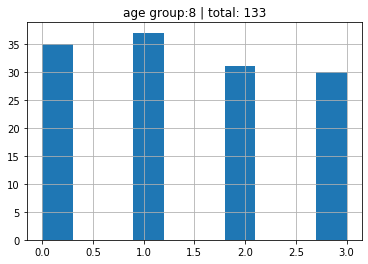

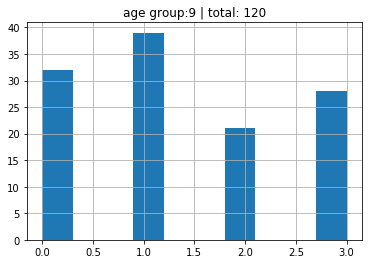

In [25]:
k = pd.DataFrame([(np.array(p_ages)/10).astype(int), p_n_comorbidities]).T

for i in range(10):
    k[k[0]==i][1].hist()
    plt.title("age group:"+str(i)+" | total: " + str(k[k[0]==i].shape[0]))
    plt.show()

In [26]:
age_comorbidities = pd.read_csv("age_comorbitidites.csv")

In [27]:
age_comorbidities.iloc[:, 1] = age_comorbidities.iloc[:, 1]/np.sum(age_comorbidities.iloc[:, 1])
age_comorbidities.iloc[:, 2] = age_comorbidities.iloc[:, 2]/np.sum(age_comorbidities.iloc[:, 2])
age_comorbidities.iloc[:, 3] = age_comorbidities.iloc[:, 3]/np.sum(age_comorbidities.iloc[:, 3])
age_comorbidities.iloc[:, 4] = age_comorbidities.iloc[:, 4]/np.sum(age_comorbidities.iloc[:, 4])

In [28]:
comorbidities = age_comorbidities.iloc[:, 0]

In [29]:
age_comorbidities.head()

,Comorbid Ailment,18-53,54-64,65-73,74-102
0,Myocardial Infarct,0.023754,0.043632,0.053722,0.057679
1,Angina/ Artery Disease,0.031112,0.070618,0.094730,0.096760
2,Congestive Heart Failure,0.011352,0.018916,0.020504,0.041738
3,Hypertension,0.283582,0.326356,0.303363,0.252485
4,Arrhythmias,0.014505,0.025725,0.037216,0.065135


In [30]:
p_comorbidities = []

for i, j in zip(p_ages, p_n_comorbidities):
    c = []
    if i < 18:
        c = []
    elif i >= 18 and i <= 53:
        c = np.random.choice(comorbidities, p=age_comorbidities.iloc[:, 1], size=j, replace=False)
    elif i >= 54 and i <= 64:
        c = np.random.choice(comorbidities, p=age_comorbidities.iloc[:, 2], size=j, replace=False)
    elif i >= 65 and i <= 73:
        c = np.random.choice(comorbidities, p=age_comorbidities.iloc[:, 3], size=j, replace=False)
    elif i >= 74:
        c = np.random.choice(comorbidities, p=age_comorbidities.iloc[:, 4], size=j, replace=False)
    p_comorbidities.append(list(c))

In [31]:
population = {i:{'at': j, 'age': k, 'state': 'free', 
                 'incubation_period':-1, 'comorbidities': m, 'n_comorbidities':l}
              for i, j, k, l, m in zip(range(n_population), p_coord, p_ages, p_n_comorbidities, p_comorbidities)}

In [32]:
effected, _ = random_sample(list(population.keys()), n_effected_people)
for i in effected:
    effect_person(population[i])
del effected

In [33]:
edges = []
c = np.array(coordinates)
while len(set(edges)) < n_nodes * connectivity:
    print(len(set(edges)))
    t, t_idx = random_sample(c, 1000)
    u, u_idx = random_sample(c, 1000)
    dist = euclidean_distances(t, u)
    for idx, i in enumerate(dist):
        a = np.argsort(i)[:2]
        edges += [(t_idx[idx], u_idx[j]) for j in a if i[j]<(n_nodes/10) and i[j] != 0]
edges = set(edges)

0
597
1050
1442
1747
2010
2212
2370
2545
2689
2799
2894
3000
3108
3199
3289
3381
3460
3530
3590
3664
3709
3760
3802
3846
3877
3918
3954
3986
4015
4058
4093
4130
4168
4201
4232
4262
4290
4313
4354
4385
4413
4442
4463
4485
4497
4523
4555
4571
4585
4600
4614
4630
4643
4659
4675
4695
4710
4725
4739
4754
4768
4779
4795
4808
4819
4830
4845
4861
4876
4892
4904
4913
4925
4932
4949
4960
4971
4980
4992


In [34]:
neighbours = {i:[] for i in coordinates_idx}
for i, j in edges:
    neighbours[i] += [j]
    neighbours[j] += [i]

In [35]:
len(coordinates), len(population), len(edges), get_status('infected', True)

(999, 2000, 5015, 2)

In [36]:
G_dash = nx.Graph()
for p in tqdm(range(len(coordinates))):
    G_dash.add_node(p, pos=[coordinates[p][0], coordinates[p][1]])
pos = nx.get_node_attributes(G_dash, 'pos')
G = deepcopy(G_dash)

100%|██████████| 999/999 [00:00<00:00, 266461.67it/s]


In [37]:
hospitalised, cured, dead = {}, {}, {}

In [38]:
history = []
k = []

for day in range(n_days):

#     print(print_stats(day))

    del_pids, del_hids = [], []
    
    rw_normal = {}
    rw_effected = {}

    rw_normal_edges = []
    rw_effected_edges = []

    for pid, person in population.items():
        current_position = person['at']
        _, rw_edges = random_walk(current_position, person, day)
        
        k.append(len(rw_edges))

        if person['state']=='infected':
            rw_effected[pid] = rw_edges
            rw_effected_edges += rw_edges
            
            person['incubation_period'] -= 1
            
            if person['incubation_period'] == 0:
                person['end_period'] = np.random.randint(5, 15)
                person['state'] = 'hospitalised'
                hospitalised[pid] = person
                del_pids.append(pid)
        else:
            rw_normal[pid] = rw_edges
            rw_normal_edges += rw_edges
            
    for pid, person in hospitalised.items():
        person['end_period'] -= 1
        
        if person['end_period'] == 0:
            is_dead_ = is_dead(person)
            if is_dead_:
                person['state'] = 'dead'
                dead[pid] = person
            else:
                person['state'] = 'cured'
                cured[pid] = person
                population[pid] = person
            del_hids.append(pid)

    contaminated_paths = Counter(rw_effected_edges)
    
#     plot_plot(iter_=day, rw_effected_edges = rw_effected_edges, rw_normal_edges=rw_normal_edges)

    for pid, j in rw_normal.items():
        if population[pid]['state'] == 'free':
        
            similar_paths = list(set(j).intersection(set(rw_effected_edges)))

            contamination_probability = sum([contaminated_paths[s] for s in similar_paths])

            denominator = contamination_confidence + contamination_probability
            t_prob = [contamination_confidence/denominator, contamination_probability/denominator]
            
            if np.random.choice([0, 1], p=t_prob):
                effect_person(population[pid])
            
    for pid in del_pids:
        del population[pid]
        
    for pid in del_hids:
        del hospitalised[pid]
        
        
    history.append([len(population), get_status("free", True), get_status('infected', True), len(hospitalised), len(cured), len(dead)])
        
    print(print_stats(day))

Day:0	P:2000	S:1997	I:3	H:0	C:0	D:0	P+H+D:2000	probability:0.0
Day:1	P:2000	S:1994	I:6	H:0	C:0	D:0	P+H+D:2000	probability:0.0
Day:2	P:2000	S:1987	I:13	H:0	C:0	D:0	P+H+D:2000	probability:0.0
Day:3	P:2000	S:1978	I:22	H:0	C:0	D:0	P+H+D:2000	probability:0.0
Day:4	P:1998	S:1960	I:38	H:2	C:0	D:0	P+H+D:2000	probability:0.0
Day:5	P:1996	S:1930	I:66	H:4	C:0	D:0	P+H+D:2000	probability:0.0
Day:6	P:1995	S:1883	I:112	H:5	C:0	D:0	P+H+D:2000	probability:0.1
Day:7	P:1988	S:1829	I:159	H:12	C:0	D:0	P+H+D:2000	probability:0.1
Day:8	P:1980	S:1749	I:231	H:20	C:0	D:0	P+H+D:2000	probability:0.1
Day:9	P:1956	S:1669	I:287	H:44	C:0	D:0	P+H+D:2000	probability:0.1
Day:10	P:1930	S:1579	I:351	H:70	C:0	D:0	P+H+D:2000	probability:0.2
Day:11	P:1899	S:1494	I:404	H:101	C:1	D:0	P+H+D:2000	probability:0.2
Day:12	P:1858	S:1395	I:460	H:141	C:3	D:1	P+H+D:2000	probability:0.2
Day:13	P:1802	S:1284	I:515	H:195	C:3	D:3	P+H+D:2000	probability:0.3
Day:14	P:1743	S:1142	I:589	H:253	C:12	D:4	P+H+D:2000	probability:0.3
Day:15	P:1677	S

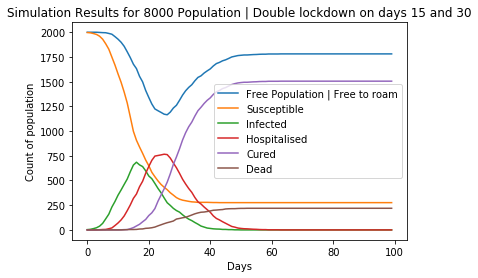

In [39]:
plt.plot(np.array(history)[:, 0], label="Free Population | Free to roam")
plt.plot(np.array(history)[:, 1], label="Susceptible")
plt.plot(np.array(history)[:, 2], label="Infected")
plt.plot(np.array(history)[:, 3], label="Hospitalised")
plt.plot(np.array(history)[:, 4], label="Cured")
plt.plot(np.array(history)[:, 5], label="Dead")
plt.title('Simulation Results for 8000 Population | Double lockdown on days 15 and 30')
plt.ylabel('Count of population')
plt.xlabel('Days')
plt.legend(loc='best')
plt.rcParams["figure.figsize"]=10,7
plt.show()